# Regression

_________________________________________________________
Starter code for the regression mini-project.
    
Loads up/formats a modified version of the dataset
(why modified?  we've removed some trouble points
that you'll find yourself in the outliers mini-project).
Draws a little scatterplot of the training/testing data

training time: 0.0 s

line 1 (with outliers):
r-squared:	-1.48499241737
slope:		[ 5.44814029]
intercept:	-102360.543294

line 2 (without outliers):
r-squared:	0.251488150398
slope:		[ 2.27410114]
intercept:	124444.388866


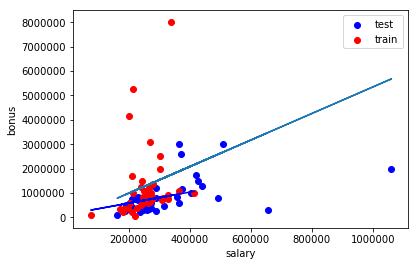

In [12]:
import sys
import pickle
sys.path.append("../tools/")
from time import time
from feature_format import featureFormat, targetFeatureSplit
from sklearn.linear_model import LinearRegression
dictionary = pickle.load( open("../final_project/final_project_dataset_modified.pkl", "r") )

### list the features you want to look at--first item in the 
### list will be the "target" feature
features_list = ["bonus", "salary"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )

### training-testing split needed in regression, just like classification
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "r"
test_color = "b"



### Your regression goes here!
### Please name it reg, so that the plotting code below picks it up and 
### plots it correctly. Don't forget to change the test_color above from "b" to
### "r" to differentiate training points from test points.

# Generate Classifier
reg = LinearRegression()

# Train the Classifier
t0 = time()
reg.fit(feature_train, target_train)
print "training time:", round(time()-t0, 3), "s"

# Print the statistics
print '\nline 1 (with outliers):'
print 'r-squared:\t' + str(reg.score(feature_test, target_test))
print 'slope:\t\t', reg.coef_
print 'intercept:\t', reg.intercept_




### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")




### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass

# Line 2 (without outliers)
reg.fit(feature_test, target_test)
plt.plot(feature_train, reg.predict(feature_train), color="b") 

# Print the statistics
print '\nline 2 (without outliers):'
print 'r-squared:\t' + str(reg.score(feature_test, target_test))
print 'slope:\t\t', reg.coef_
print 'intercept:\t', reg.intercept_
plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()
